<a href="https://colab.research.google.com/github/LeodeFaria/IDP/blob/main/3_aula_Variabilidade_e_Correla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 aula - Estudando Variabilidade e Correlação Linear

## Importanto os principais pacotes:


*   Pandas
*   numpy
*   matplotlib.pyplot
*   seaborn



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Apresentando o conjunto de dados: Peso de Bebês no Nascimento
## Fonte: 
### https://www.sheffield.ac.uk/mash/statistics/datasets

1.   Este conjunto de dados contém informações sobre recém-nascidos  e seus pais.  

2.   Contém variáveis principalmente contínuas (embora alguns tenham apenas alguns valores, por exemplo, número de cigarros fumados por dia) e é mais útil para correlação e regressão.  

3.   Os pesos dos bebês que as mães fumavam foram ajustados ligeiramente para exagerar as diferenças entre as mães que fumavam e não fumavam. 

4.   **Variável principal dependente** = Peso ao nascer (lbs)


In [ ]:
df1 = pd.read_csv('/content/Birthweight_reduced_kg_R.csv')
df1.head()

### Dicionários das Variáveis
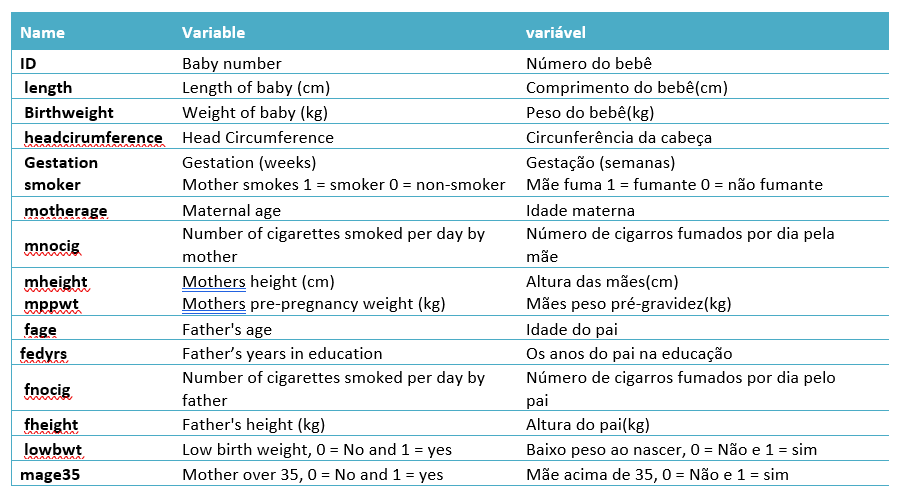

## Primeiras estatíticas: 


1.   Contagem de Linhas e Colunas
2.   Sumário estatístico das variáveis quantitativas 


In [ ]:
df1.shape

### O conjunto de dados possúi 42 linhas (bebês) e 16 colunas (variávies)

## Análise univariada das colunas quantitativas (selecionadas)


*   describe()



In [ ]:
df1.describe()

### Histograma (do Pandas)

In [ ]:
df1.hist(figsize = (16,10));

## Análise Bivariada das colunas quantitativas (selecionadas)

### Análisando a Relação entre Peso ao Nascer e *Cincunferência da Cabeça*

In [ ]:
x = df1['Birthweight']
y = df1['Headcirc']

df = pd.DataFrame({
    'Peso ao nascer em Kg': x,
    'Circunferência da cabeça em cm': y})
df.head(n=5)

## Referência para o gráfico de dispersão com Seaborn:
https://datavizpyr.com/scatter-plot-with-marginal-histograms-in-python-with-seaborn/

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})

sns.scatterplot(x="Peso ao nascer em Kg", y="Circunferência da cabeça em cm", data=df)
plt.xlabel("Peso ao Nascer - Kg", size=16)
plt.ylabel("Circunferência da Cabeça - cm", size=16)
plt.title("Relação entre Peso e Cabeça", size=18)
plt.savefig("simple_scatter_plot_Seanborn.png",figsize=(4,4), dpi=150);

### Cálculo do Coeficiente de Correlação de Pearson

In [ ]:
df.corr(method="pearson")

## Combinando análise univariada com bivariada
### Fonte: https://datavizpyr.com/scatter-plot-with-marginal-histograms-in-python-with-seaborn/

In [ ]:
sns.jointplot(x="Peso ao nascer em Kg", 
              y="Circunferência da cabeça em cm",
             edgecolor="white",
             data=df)
#plt.title("Scatter Plot with Marginal Histograms: Seaborn", size=18, pad=80)
plt.savefig("marginal_plot_Seaborn.png",figsize=(4,4), dpi=150)

# Existe relação entre as idades dos pais e os tamanhos dos bebês?

In [ ]:
x = df1['Birthweight']
y = df1['fage']

df = pd.DataFrame({
    'Peso ao nascer em Kg': x,
    'Idade dos pais': y})
df.head(n=3)

sns.set(rc={'figure.figsize':(10,6)})

sns.scatterplot(x="Peso ao nascer em Kg", y="Idade dos pais", data=df)
plt.xlabel("Peso ao Nascer - Kg", size=16)
plt.ylabel("Idade dos pais", size=16)
plt.title("Relação entre Peso e Idade dos Pais", size=18)
#plt.savefig("simple_scatter_plot_Seanborn.png",figsize=(4,4), dpi=150);


In [ ]:
df.corr(method="pearson")

## Matriz de correlação dos Dados

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})

corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Exercícios de Fixação
## 1) Determine o Coeficiente de Variação (CV) das seguintes variávies:


Passo a passo:
1.   Encontre o desvio-padrão de cada variável
2.   Encontre a média de cada varíavel
3.   Calcule o CV como sendo a divisão entre 1. e 2.
4.   Imprima um datraframe contendo o nome da variavel e o CV (ordenado por CV).
 
['Length', 'Birthweight', 'Headcirc', 'Gestation', 'smoker',
       'mage', 'mnocig', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig',
       'fheight', 'lowbwt', 'mage35']

In [ ]:
df1.describe()

In [39]:
# Amplitude - 
# df1['Birthweight'].max() - df1['Birthweight'].min()


2.6500000000000004

In [36]:
# cv =  lambda x: np.std('Birthweight') / np.mean('Birthweight')
cv =  lambda x: np.std('Birthweight') / np.mean('Birthweight')
print(cv)

<function <lambda> at 0x7fa7cf470d40>


## 2)  Encontrei quais covaríaveis possuem maior variabilidade segundo o Coeficiente de Variação

# Carregando dados do pacote SEABORN

In [ ]:
import seaborn as sns
sns.get_dataset_names()

In [17]:
# Load an example dataset
carros = sns.load_dataset("mpg")

In [19]:
carros.head(n=3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


## 3) Determine se há correlação estatística forte (de Pearson) entre as varíaveis do dataset carros.
### Identifique correlações positivas e negativas 

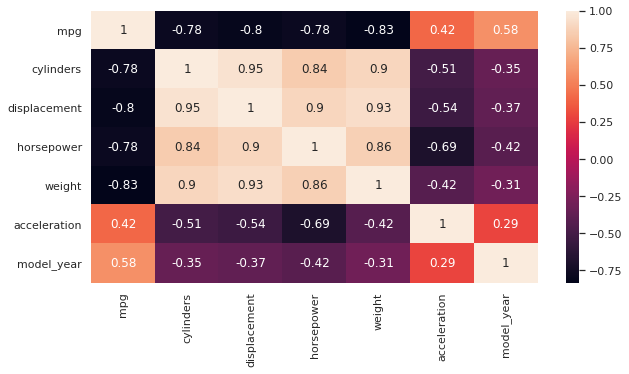

In [25]:
# carros.shape
sns.set(rc={'figure.figsize':(10,5)})

corrMatrix = carros.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## 4) Encontrei quais covaríaveis possuem maior variabilidade segundo o Coeficiente de Variação

## Extra - Existe relação entre o consumo de cigarros por parte dos pais e a saúde do bebê? Qual é o impacto dessa relação?